## Naufal Khairul Rizky
## 5025221127
## Pembelajaran Mesin B
## K-Means Clustering Assignment

### Selesaikan permasalahan dataset penjualan mobil menggunakan K-Means Clustering, lalu analisis hasil clustering. Silakan Anda juga bisa melakukan EDA (Exploratory Data Analysis) maupun data preprocessing sesuai kebutuhan.

##### Import libraries

In [1]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
%matplotlib inline

##### Load Dataset from CSV File

In [2]:
import pandas as pd
cust_df = pd.read_csv("car_prices.csv")
cust_df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


## Pada data di atas, kolom data make, model, trim, body, transmission, vin, state, color, interior, seller, dan saledate adalah discrete variable. Karena pada perhitungan Euclidean K-Means tidak memerlukan discrete variable, maka perlu dihilangkan.

In [3]:
df = cust_df.drop(['make', 'model','trim','body','transmission', 'vin', 'state', 'color', 'interior', 'seller', 'saledate'], axis=1)
df.head()

,year,condition,odometer,mmr,sellingprice
0,2015,5.0,16639.0,20500,21500
1,2015,5.0,9393.0,20800,21500
2,2014,45.0,1331.0,31900,30000
3,2015,41.0,14282.0,27500,27750
4,2014,43.0,2641.0,66000,67000


##### Preprocessing dengan Perhitungan Standar Deviasi 

In [4]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-1.21499756, -1.01724621,  0.85837572,  1.00160928],
       [-1.21499756, -1.14109717,  0.89016239,  1.00160928],
       [ 1.20306933, -1.27889547,  2.06626903,  1.90175099],
       ...,
       [ 1.38442435, -0.52437204,  1.26100682,  1.37225587],
       [ 0.71945595, -0.79743896,  0.95373572,  1.0969184 ],
       [ 1.32397267, -0.6689218 ,  0.7683135 ,  0.77922133]])

#### MODELLING

In [5]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 0 0 ... 0 0 0]


#### INSIGHTS

In [6]:
df["Clus_km"] = labels
df.head(5)

,year,condition,odometer,mmr,sellingprice,Clus_km
0,2015,5.0,16639.0,20500,21500,0
1,2015,5.0,9393.0,20800,21500,0
2,2014,45.0,1331.0,31900,30000,0
3,2015,41.0,14282.0,27500,27750,0
4,2014,43.0,2641.0,66000,67000,0


##### Cek Centroid Values dengan Rata Rata

In [7]:
df.groupby('Clus_km').mean()

,year,condition,odometer,mmr,sellingprice
Clus_km,,,,,
0,2012.165062,32.912106,31817.267786,17870.416945,17451.759655
1,2003.471679,19.442462,182024.659971,3269.702316,3033.917481
2,2006.885982,26.361197,101833.936739,7626.052798,7315.687259


### Hasil K-Means (Perbandingan antara Condition, Selling Price, dan Odometer)

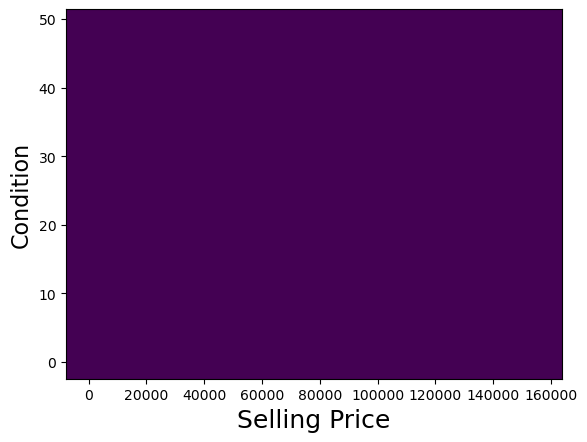

In [8]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 3], X[:, 0], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Selling Price', fontsize=18)
plt.ylabel('Condition', fontsize=16)

plt.show()


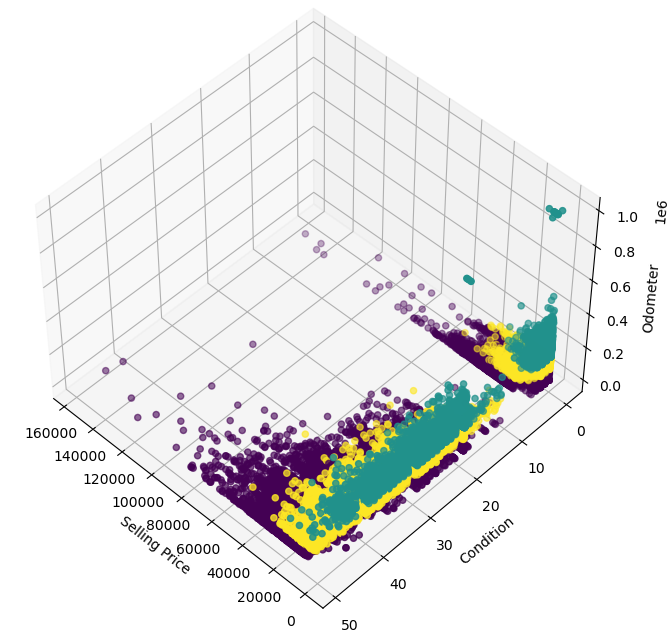

In [10]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Selling Price')
ax.set_ylabel('Condition')
ax.set_zlabel('Odometer')

ax.scatter(X[:, 3], X[:, 0], X[:, 1], c= labels.astype(np.float))


#### ANALISIS
Berdasarkan analisis yang telah dilakukan terhadap dataset harga penjualan mobil, dapat ditarik beberapa kesimpulan yang menarik. Pertama, terdapat pola yang jelas antara odometer mobil dan harga jualnya (Selling Price). Mobil-mobil dengan odometer yang rendah cenderung memiliki harga jual yang lebih tinggi dibandingkan dengan mobil-mobil dengan odometer tinggi. Hal ini mencerminkan asumsi umum bahwa jarak penggunaan sebuah mobil secara langsung memengaruhi nilai jualnya.

Kedua, dari segi jumlah, mobil dalam kondisi baik (>20) memiliki jumlah terbanyak dibandingkan dengan kondisi mobil yang kurang baik (<20). Ini menunjukkan bahwa sebagian besar mobil yang dijual berada dalam kondisi yang cukup baik. 

Namun, karena data di atas tidak memiliki nilai scale performa dari setiap model mobil dari merek merek tertentu (BMW, Toyota, dll), maka selling price nya menjadi kurang valid karena performa dan model suatu mobil sangat berpengaruh ke selling price dan MMR. 

Kesimpulannya, analisis ini memberikan wawasan bagi calon pembeli dan penjual mobil, membantu mereka untuk memahami bagaimana kondisi sebuah mobil memengaruhi harga jualnya, serta faktor-faktor apa yang perlu dipertimbangkan dalam proses penjualan dan pembelian.